# K-Nearest Neighbors

This notebook shows the K-nearest neighbors model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [2]:
df = pd.read_csv("bank-additional-clean.csv")

In [3]:
df.shape

(15859, 42)

In [4]:
df.head()

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,40,0,1,0,7,2,180,1,999,1,...,0,0,0,1,0,1,0,1,0,0
1,49,0,0,0,4,1,464,2,999,0,...,0,0,0,1,0,0,1,0,1,0
2,41,0,1,0,4,0,307,1,999,0,...,1,0,0,0,0,0,1,0,1,0
3,54,0,1,0,4,1,111,2,999,0,...,1,0,0,0,0,0,1,0,1,0
4,57,0,1,1,0,1,45,1,999,1,...,0,0,0,0,1,1,0,1,0,0


### Modelling

1. Split dataset into training and test set

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# Set up timer
t = Timer()

## KNN

Train a basic KNN with k = 1

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
knn_base = KNeighborsClassifier(n_neighbors=5)
knn_base.fit(X_train, y_train)
y_pred_knn_base_train = knn_base.predict(X_train)
y_pred_knn_base_test = knn_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_knn_base_train)
precision_train = precision_score(y_train, y_pred_knn_base_train)
recall_train = recall_score(y_train, y_pred_knn_base_train)
f1_train = f1_score(y_train, y_pred_knn_base_train)
roc_train = roc_auc_score(y_train, y_pred_knn_base_train)

accuracy_test = accuracy_score(y_test, y_pred_knn_base_test)
precision_test = precision_score(y_test, y_pred_knn_base_test)
recall_test = recall_score(y_test, y_pred_knn_base_test)
f1_test = f1_score(y_test, y_pred_knn_base_test)
roc_test = roc_auc_score(y_test, y_pred_knn_base_test)

print(f"Train Accuracy of Base KNN: {accuracy_train:.3f}")
print(f"Train Precision of Base KNN: {precision_train:.3f}")
print(f"Train Recall of Base KNN: {recall_train:.3f}")
print(f"Train F1 of Base KNN: {f1_train:.3f}")
print(f"Train ROC of Base KNN: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Base KNN: {accuracy_test:.3f}")
print(f"Test Precision of Base KNN: {precision_test:.3f}")
print(f"Test Recall of Base KNN: {recall_test:.3f}")
print(f"Test F1 of Base KNN: {f1_test:.3f}")
print(f"Test ROC of Base KNN: {roc_test:.3f}")

Elapsed time: 1.1919 seconds
Train Accuracy of Base KNN: 0.893
Train Precision of Base KNN: 0.786
Train Recall of Base KNN: 0.782
Train F1 of Base KNN: 0.784
Train ROC of Base KNN: 0.856
---
Test Accuracy of Base KNN: 0.860
Test Precision of Base KNN: 0.701
Test Recall of Base KNN: 0.698
Test F1 of Base KNN: 0.699
Test ROC of Base KNN: 0.803


Use Cross Validation

In [9]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
knn_base_res = cross_validate(
      estimator=knn_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 3.1565 seconds


In [10]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(knn_base_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(knn_base_res[m]):.3f}")

train_accuracy: 0.892
train_precision: 0.783
train_recall: 0.781
train_f1: 0.782
----
test_accuracy: 0.852
test_precision: 0.703
test_recall: 0.698
test_f1: 0.700


Plot training curve of Base KNN

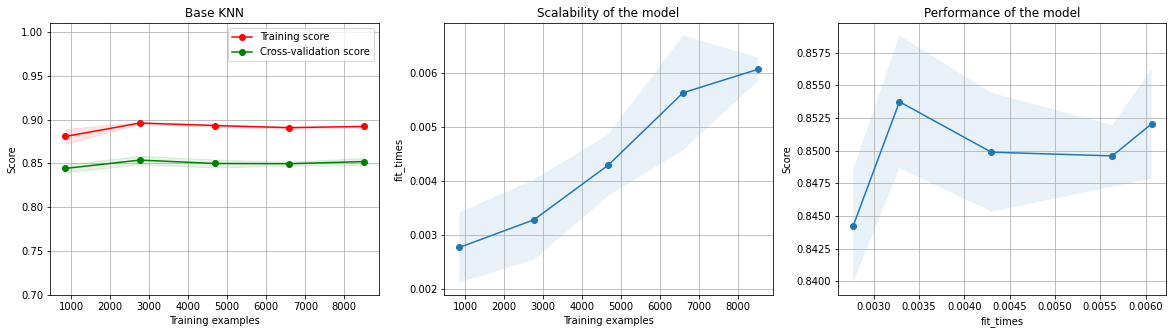

In [11]:
title = "Base KNN"
plot_learning_curve(
    knn_base, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [12]:
y_pred_knn_base_train = cross_val_predict(knn_base, X_train, y_train, cv=5)
y_pred_knn_base_test = cross_val_predict(knn_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_knn_base_train)
precision_train = precision_score(y_train, y_pred_knn_base_train)
recall_train = recall_score(y_train, y_pred_knn_base_train)
f1_train = f1_score(y_train, y_pred_knn_base_train)
roc_train = roc_auc_score(y_train, y_pred_knn_base_train)

accuracy_test = accuracy_score(y_test, y_pred_knn_base_test)
precision_test = precision_score(y_test, y_pred_knn_base_test)
recall_test = recall_score(y_test, y_pred_knn_base_test)
f1_test = f1_score(y_test, y_pred_knn_base_test)
roc_test = roc_auc_score(y_test, y_pred_knn_base_test)

print(f"Train Accuracy of Base KNN: {accuracy_train:.3f}")
print(f"Train Precision of Base KNN: {precision_train:.3f}")
print(f"Train Recall of Base KNN: {recall_train:.3f}")
print(f"Train F1 of Base KNN: {f1_train:.3f}")
print(f"Train ROC of Base KNN: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Base KNN: {accuracy_test:.3f}")
print(f"Test Precision of Base KNN: {precision_test:.3f}")
print(f"Test Recall of Base KNN: {recall_test:.3f}")
print(f"Test F1 of Base KNN: {f1_test:.3f}")
print(f"Test ROC of Base KNN: {roc_test:.3f}")

Train Accuracy of Base KNN: 0.852
Train Precision of Base KNN: 0.703
Train Recall of Base KNN: 0.698
Train F1 of Base KNN: 0.700
Train ROC of Base KNN: 0.800
---
Test Accuracy of Base KNN: 0.846
Test Precision of Base KNN: 0.679
Test Recall of Base KNN: 0.646
Test F1 of Base KNN: 0.662
Test ROC of Base KNN: 0.776


Determine best K for Knn

In [54]:
hp_scores = {}
for p in [1,2]:
    for k in range(1,45):
        hp_scores[f"{p},{k}"] = {}
        knn = KNeighborsClassifier(n_neighbors=k, p=p)
        knn.fit(X_train,y_train)
        y_pred_knn_train = knn.predict(X_train)
        y_pred_knn_test = knn.predict(X_test)

        train_acc = accuracy_score(y_train, y_pred_knn_train)
        train_precision = precision_score(y_train, y_pred_knn_train)
        train_recall = recall_score(y_train, y_pred_knn_train)
        train_f1 = f1_score(y_train, y_pred_knn_train)
        train_roc_auc = roc_auc_score(y_train, y_pred_knn_train)
        train_error_rate = np.mean(y_pred_knn_train != y_train)

        test_acc = accuracy_score(y_test, y_pred_knn_test)
        test_precision = precision_score(y_test, y_pred_knn_test)
        test_recall = recall_score(y_test, y_pred_knn_test)
        test_f1 = f1_score(y_test, y_pred_knn_test)
        test_roc_auc = roc_auc_score(y_test, y_pred_knn_test)
        test_error_rate = np.mean(y_pred_knn_test != y_test)

        hp_scores[f"{p},{k}"]["train_acc"] = train_acc
        hp_scores[f"{p},{k}"]["train_precision"] = train_precision
        hp_scores[f"{p},{k}"]["train_recall"] = train_recall
        hp_scores[f"{p},{k}"]["train_f1"] = train_f1
        hp_scores[f"{p},{k}"]["train_roc_auc"] = train_roc_auc
        hp_scores[f"{p},{k}"]["train_error_rate"] = train_error_rate

        hp_scores[f"{p},{k}"]["test_acc"] = test_acc
        hp_scores[f"{p},{k}"]["test_precision"] = test_precision
        hp_scores[f"{p},{k}"]["test_recall"] = test_recall
        hp_scores[f"{p},{k}"]["test_f1"] = test_f1
        hp_scores[f"{p},{k}"]["test_roc_auc"] = test_roc_auc
        hp_scores[f"{p},{k}"]["test_error_rate"] = test_error_rate

In [58]:
hp_scores_df = pd.DataFrame(hp_scores)

In [63]:
hp_scores_df.idxmin(axis=1)

train_acc           2,40
train_precision     1,43
train_recall         2,2
train_f1            2,32
train_roc_auc        2,2
train_error_rate     1,1
test_acc             2,2
test_precision       1,1
test_recall          2,2
test_f1              2,2
test_roc_auc         2,2
test_error_rate     1,41
dtype: object

In [59]:
hp_scores_df.idxmax(axis=1)

train_acc            1,1
train_precision      1,1
train_recall         1,1
train_f1             1,1
train_roc_auc        1,1
train_error_rate    2,40
test_acc            1,41
test_precision       1,2
test_recall         1,37
test_f1             1,37
test_roc_auc        1,37
test_error_rate      2,2
dtype: object

In [70]:
hp_scores_df['1,37']

train_acc           0.870871
train_precision     0.737040
train_recall        0.744875
train_f1            0.740937
train_roc_auc       0.828638
train_error_rate    0.129129
test_acc            0.870080
test_precision      0.720291
test_recall         0.727347
test_f1             0.723802
test_roc_auc        0.820521
test_error_rate     0.129920
Name: 1,37, dtype: float64

In [69]:
hp_scores_df['1,41']

train_acc           0.870400
train_precision     0.736189
train_recall        0.743736
train_f1            0.739943
train_roc_auc       0.827943
train_error_rate    0.129600
test_acc            0.870271
test_precision      0.723039
test_recall         0.722449
test_f1             0.722744
test_roc_auc        0.818945
test_error_rate     0.129729
Name: 1,41, dtype: float64

In [72]:
p1_columns = [c for c in hp_scores_df.columns if c.startswith("1,")]
p2_columns = [c for c in hp_scores_df.columns if c.startswith("2,")]

p1_roc_scores_test = hp_scores_df.loc["test_roc_auc", p1_columns]
p2_roc_scores_test = hp_scores_df.loc["test_roc_auc", p2_columns]

p1_error_scores_test = hp_scores_df.loc["test_error_rate", p1_columns]
p2_error_scores_test = hp_scores_df.loc["test_error_rate", p2_columns]

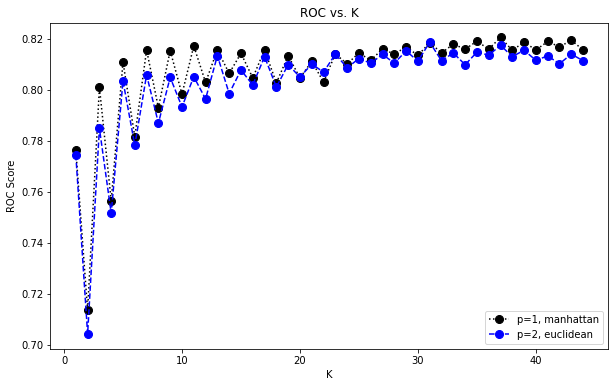

In [73]:
plt.figure(figsize=(10,6))
plt.plot(
    range(1,45),
    p1_roc_scores_test,
    color='black', 
    linestyle='dotted', 
    marker='o',
    markerfacecolor='black', 
    markersize=8,
    label="p=1, manhattan"
)
plt.plot(
    range(1,45),
    p2_roc_scores_test,
    color='blue', 
    linestyle='dashed', 
    marker='o',
    markerfacecolor='blue', 
    markersize=8,
    label="p=2, euclidean"
)
plt.title('ROC vs. K')
plt.xlabel('K')
plt.ylabel('ROC Score')
plt.legend()

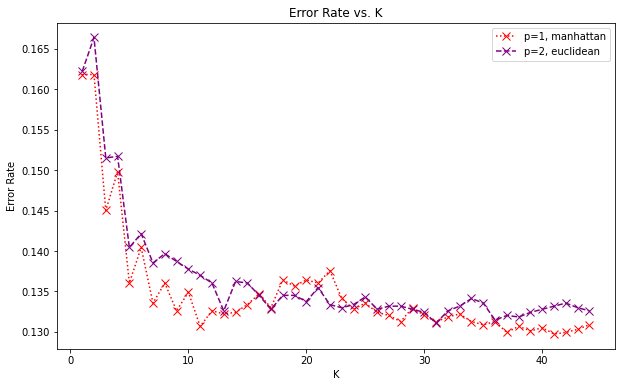

In [71]:
plt.figure(figsize=(10,6))
plt.plot(
    range(1,45),
    p1_error_scores_test,
    color='red', 
    linestyle='dotted', 
    marker='x',
    markerfacecolor='orange', 
    markersize=8,
    label="p=1, manhattan"
)
plt.plot(
    range(1,45),
    p2_error_scores_test,
    color='purple', 
    linestyle='dashed', 
    marker='x',
    markerfacecolor='orange', 
    markersize=8,
    label="p=2, euclidean"
)

plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()

Train with best k and best p

The best k is determined around k=17, with p=1

In [13]:
k=37
p=1

t.start()
knn_adv = KNeighborsClassifier(n_neighbors=k, p=p)
knn_adv.fit(X_train, y_train)
y_pred_knn_adv_train = knn_adv.predict(X_train)
y_pred_knn_adv_test = knn_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_knn_adv_train)
precision_train = precision_score(y_train, y_pred_knn_adv_train)
recall_train = recall_score(y_train, y_pred_knn_adv_train)
f1_train = f1_score(y_train, y_pred_knn_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_knn_adv_train)


accuracy_test = accuracy_score(y_test, y_pred_knn_adv_test)
precision_test = precision_score(y_test, y_pred_knn_adv_test)
recall_test = recall_score(y_test, y_pred_knn_adv_test)
f1_test = f1_score(y_test, y_pred_knn_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_knn_adv_test)


print(f"Train Accuracy of Adv KNN k={k}, p={p}: {accuracy_train:.3f}")
print(f"Train Precision of Adv KNN k={k}, p={p}: {precision_train:.3f}")
print(f"Train Recall of Adv KNN k={k}, p={p}: {recall_train:.3f}")
print(f"Train F1 of Adv KNN k={k}, p={p}: {f1_train:.3f}")
print(f"Train ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Adv KNN k={k}, p={p}: {accuracy_test:.3f}")
print(f"Test Precision of Adv KNN k={k}, p={p}: {precision_test:.3f}")
print(f"Test Recall of Adv KNN k={k}, p={p}: {recall_test:.3f}")
print(f"Test F1 of Adv KNN k={k}, p={p}: {f1_test:.3f}")
print(f"Test ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_test:.3f}")


Elapsed time: 1.5912 seconds
Train Accuracy of Adv KNN k=37, p=1: 0.871
Train Precision of Adv KNN k=37, p=1: 0.737
Train Recall of Adv KNN k=37, p=1: 0.745
Train F1 of Adv KNN k=37, p=1: 0.741
Train ROC AUC of Adv KNN k=37, p=1: 0.829
---
Test Accuracy of Adv KNN k=37, p=1: 0.870
Test Precision of Adv KNN k=37, p=1: 0.720
Test Recall of Adv KNN k=37, p=1: 0.727
Test F1 of Adv KNN k=37, p=1: 0.724
Test ROC AUC of Adv KNN k=37, p=1: 0.821


In [14]:
t.start()
knn_adv_res = cross_validate(
      estimator=knn_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 4.6637 seconds


In [15]:
for m in training_metrics:
    print(f"{m}: {np.mean(knn_adv_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(knn_adv_res[m]):.3f}")

train_accuracy: 0.870
train_precision: 0.737
train_recall: 0.737
train_f1: 0.737
----
test_accuracy: 0.865
test_precision: 0.728
test_recall: 0.727
test_f1: 0.727


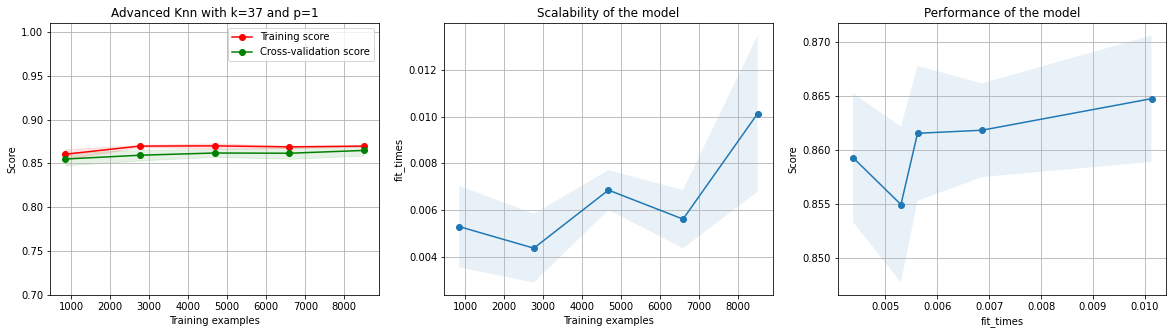

In [83]:
title = f"Advanced Knn with k={k} and p={p}"
plot_learning_curve(
    knn_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [78]:
y_pred_knn_adv_train = cross_val_predict(knn_adv, X_train, y_train, cv=5)
y_pred_knn_adv_test = cross_val_predict(knn_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_knn_adv_train)
precision_train = precision_score(y_train, y_pred_knn_adv_train)
recall_train = recall_score(y_train, y_pred_knn_adv_train)
f1_train = f1_score(y_train, y_pred_knn_adv_train)
roc_auc_train = roc_auc_score(y_train, y_pred_knn_adv_train)


accuracy_test = accuracy_score(y_test, y_pred_knn_adv_test)
precision_test = precision_score(y_test, y_pred_knn_adv_test)
recall_test = recall_score(y_test, y_pred_knn_adv_test)
f1_test = f1_score(y_test, y_pred_knn_adv_test)
roc_auc_test = roc_auc_score(y_test, y_pred_knn_adv_test)


print(f"Train Accuracy of Adv KNN k={k}, p={p}: {accuracy_train:.3f}")
print(f"Train Precision of Adv KNN k={k}, p={p}: {precision_train:.3f}")
print(f"Train Recall of Adv KNN k={k}, p={p}: {recall_train:.3f}")
print(f"Train F1 of Adv KNN k={k}, p={p}: {f1_train:.3f}")
print(f"Train ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_train:.3f}")

print("---")
print(f"Test Accuracy of Adv KNN k={k}, p={p}: {accuracy_test:.3f}")
print(f"Test Precision of Adv KNN k={k}, p={p}: {precision_test:.3f}")
print(f"Test Recall of Adv KNN k={k}, p={p}: {recall_test:.3f}")
print(f"Test F1 of Adv KNN k={k}, p={p}: {f1_test:.3f}")
print(f"Test ROC AUC of Adv KNN k={k}, p={p}: {roc_auc_test:.3f}")

Train Accuracy of Adv KNN k=37, p=1: 0.865
Train Precision of Adv KNN k=37, p=1: 0.727
Train Recall of Adv KNN k=37, p=1: 0.727
Train F1 of Adv KNN k=37, p=1: 0.727
Train ROC AUC of Adv KNN k=37, p=1: 0.818
---
Test Accuracy of Adv KNN k=37, p=1: 0.857
Test Precision of Adv KNN k=37, p=1: 0.716
Test Recall of Adv KNN k=37, p=1: 0.642
Test F1 of Adv KNN k=37, p=1: 0.677
Test ROC AUC of Adv KNN k=37, p=1: 0.782


In [16]:
y_pred_base_knn_train_f = knn_base.predict(X_train)
y_pred_adv_knn_train_f = knn_adv.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_knn_train_f)
precision_base_train = precision_score(y_train, y_pred_base_knn_train_f)
recall_base_train = recall_score(y_train, y_pred_base_knn_train_f)
f1_base_train = f1_score(y_train, y_pred_base_knn_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_knn_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_knn_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_knn_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_knn_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_knn_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_knn_train_f)

y_pred_base_knn_test_f = knn_base.predict(X_test)
y_pred_adv_knn_test_f = knn_adv.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_knn_test_f)
precision_base_test = precision_score(y_test, y_pred_base_knn_test_f)
recall_base_test = recall_score(y_test, y_pred_base_knn_test_f)
f1_base_test = f1_score(y_test, y_pred_base_knn_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_knn_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_knn_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_knn_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_knn_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_knn_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_knn_test_f)

In [17]:
print("Final - Training Set Performance")
print(f"Train Accuracy of Base KNN: {accuracy_base_train:.3f}")
print(f"Train Precision of Base KNN: {precision_base_train:.3f}")
print(f"Train Recall of Base KNN: {recall_base_train:.3f}")
print(f"Train F1 of Base KNN: {f1_base_train:.3f}")
print(f"Train ROC of Base KNN: {roc_base_train:.3f}")
print("-")
print(f"Train Accuracy of Adv KNN: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv KNN: {precision_adv_train:.3f}")
print(f"Train Recall of Adv KNN: {recall_adv_train:.3f}")
print(f"Train F1 of Adv KNN: {f1_adv_train:.3f}")
print(f"Train ROC of Adv KNN: {roc_adv_train:.3f}")

print("---")

print(f"Test Accuracy of Base KNN: {accuracy_base_test:.3f}")
print(f"Test Precision of Base KNN: {precision_base_test:.3f}")
print(f"Test Recall of Base KNN: {recall_base_test:.3f}")
print(f"Test F1 of Base KNN: {f1_base_test:.3f}")
print(f"Test ROC of Base KNN: {roc_base_test:.3f}")
print("-")
print(f"Test Accuracy of Adv KNN: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv KNN: {precision_adv_test:.3f}")
print(f"Test Recall of Adv KNN: {recall_adv_test:.3f}")
print(f"Test F1 of Adv KNN: {f1_adv_test:.3f}")
print(f"Test ROC of Adv KNN: {roc_adv_test:.3f}")

Final - Training Set Performance
Train Accuracy of Base KNN: 0.893
Train Precision of Base KNN: 0.786
Train Recall of Base KNN: 0.782
Train F1 of Base KNN: 0.784
Train ROC of Base KNN: 0.856
-
Train Accuracy of Adv KNN: 0.871
Train Precision of Adv KNN: 0.737
Train Recall of Adv KNN: 0.745
Train F1 of Adv KNN: 0.741
Train ROC of Adv KNN: 0.829
---
Test Accuracy of Base KNN: 0.860
Test Precision of Base KNN: 0.701
Test Recall of Base KNN: 0.698
Test F1 of Base KNN: 0.699
Test ROC of Base KNN: 0.803
-
Test Accuracy of Adv KNN: 0.870
Test Precision of Adv KNN: 0.720
Test Recall of Adv KNN: 0.727
Test F1 of Adv KNN: 0.724
Test ROC of Adv KNN: 0.821


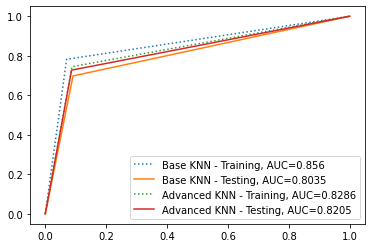

In [18]:
plt.figure(0).clf()

# Basic
fpr, tpr, _ = roc_curve(y_train, y_pred_base_knn_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_knn_train_f), 4)
plt.plot(fpr,tpr,label="Base KNN - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_test, y_pred_base_knn_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_knn_test_f), 4)
plt.plot(fpr,tpr,label="Base KNN - Testing, AUC="+str(auc), linestyle="solid")

# ADV

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_knn_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_knn_train_f), 4)
plt.plot(fpr,tpr,label=f"Advanced KNN - Training, AUC="+str(auc), linestyle="dotted")
plt.legend()

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_knn_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_knn_test_f), 4)
plt.plot(fpr,tpr,label=f"Advanced KNN - Testing, AUC="+str(auc), linestyle="solid")
plt.legend()